In [142]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
#Reading the data
data = pd.read_csv(r"D:\Downloads\weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [144]:
data.shape

(142193, 24)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [146]:
#Encoding the columns
data['RainToday'] = data['RainToday'].map({'Yes':1, 'No':0})
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes':1, 'No':0})

<Axes: xlabel='RainTomorrow'>

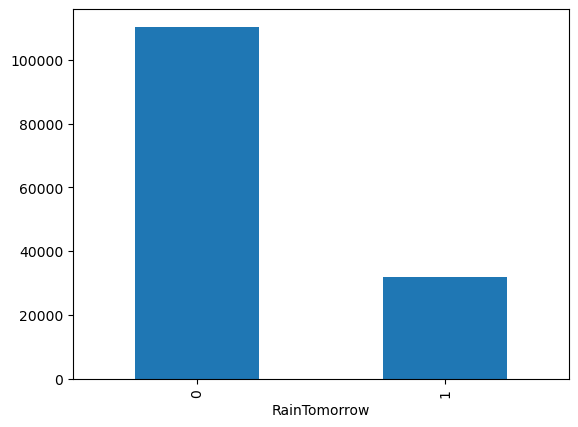

In [147]:
#Checking the dataset for class imbalance
data['RainTomorrow'].value_counts().plot(kind="bar")

<Axes: xlabel='RainTomorrow'>

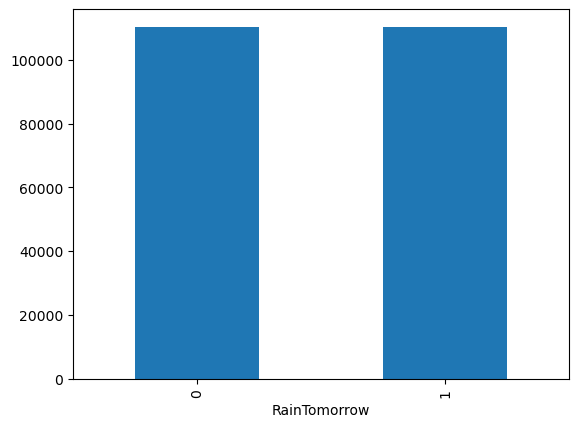

In [148]:
#Taking care of class imbalance
from sklearn.utils import resample

no = data[data['RainTomorrow'] == 0]
yes = data[data['RainTomorrow'] == 1]

y_osample = resample(yes, replace=True, n_samples=len(no))
new_data = pd.concat([no, y_osample])

new_data['RainTomorrow'].value_counts().plot(kind="bar")

<Axes: >

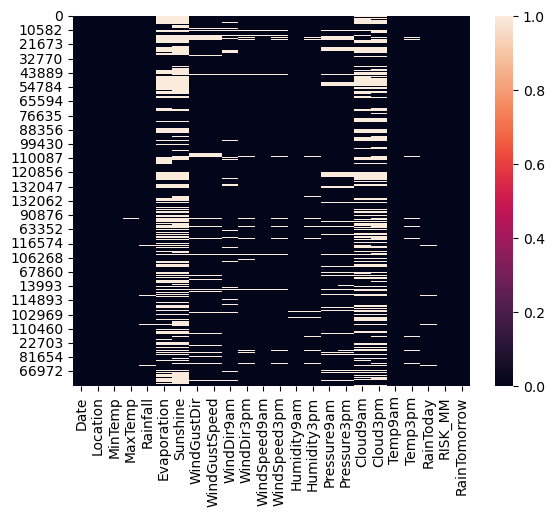

In [149]:
#Checking missing data
sns.heatmap(new_data.isnull())

In [150]:
new_data.isnull().sum().sort_values(ascending=False)

Sunshine         104698
Evaporation       95198
Cloud3pm          85645
Cloud9am          81358
Pressure9am       21580
Pressure3pm       21567
WindGustDir       15450
WindGustSpeed     15328
WindDir9am        14701
WindDir3pm         6367
Humidity3pm        5957
Temp3pm            4519
WindSpeed3pm       4292
Humidity9am        3097
RainToday          3080
Rainfall           3080
WindSpeed9am       2201
Temp9am            1660
MinTemp            1058
MaxTemp             471
RISK_MM               0
Date                  0
Location              0
RainTomorrow          0
dtype: int64

In [151]:
#Imputing categorical columns with mode (use mean for numerical columns)
for column in new_data.select_dtypes(include='object').columns:
    new_data[column] = new_data[column].fillna(new_data[column].mode()[0])

In [152]:
#Encoding the imputed columns
from sklearn.preprocessing import LabelEncoder
encoded = {}

for column in new_data.select_dtypes(include='object').columns:
    encoded[column] = LabelEncoder()
    new_data[column] = encoded[column].fit_transform(new_data[column])

In [153]:
# #Taking care of missing NaN numerical values
# from sklearn.impute import KNNImputer

# KNNImputed = new_data.copy(deep=True)
# knnimputer = KNNImputer(n_neighbors = 10)
# KNNImputed.iloc[:, :] = knnimputer.fit_transform(new_data)
#!!! THIS IS TOO SLOW !!!

In [154]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MiceImputed = new_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(new_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [155]:
#Removing Outliers
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3-Q1
IQR

Date             1536.000000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.095854
Sunshine            5.958014
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.700000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.691517
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64

In [156]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156493, 24)

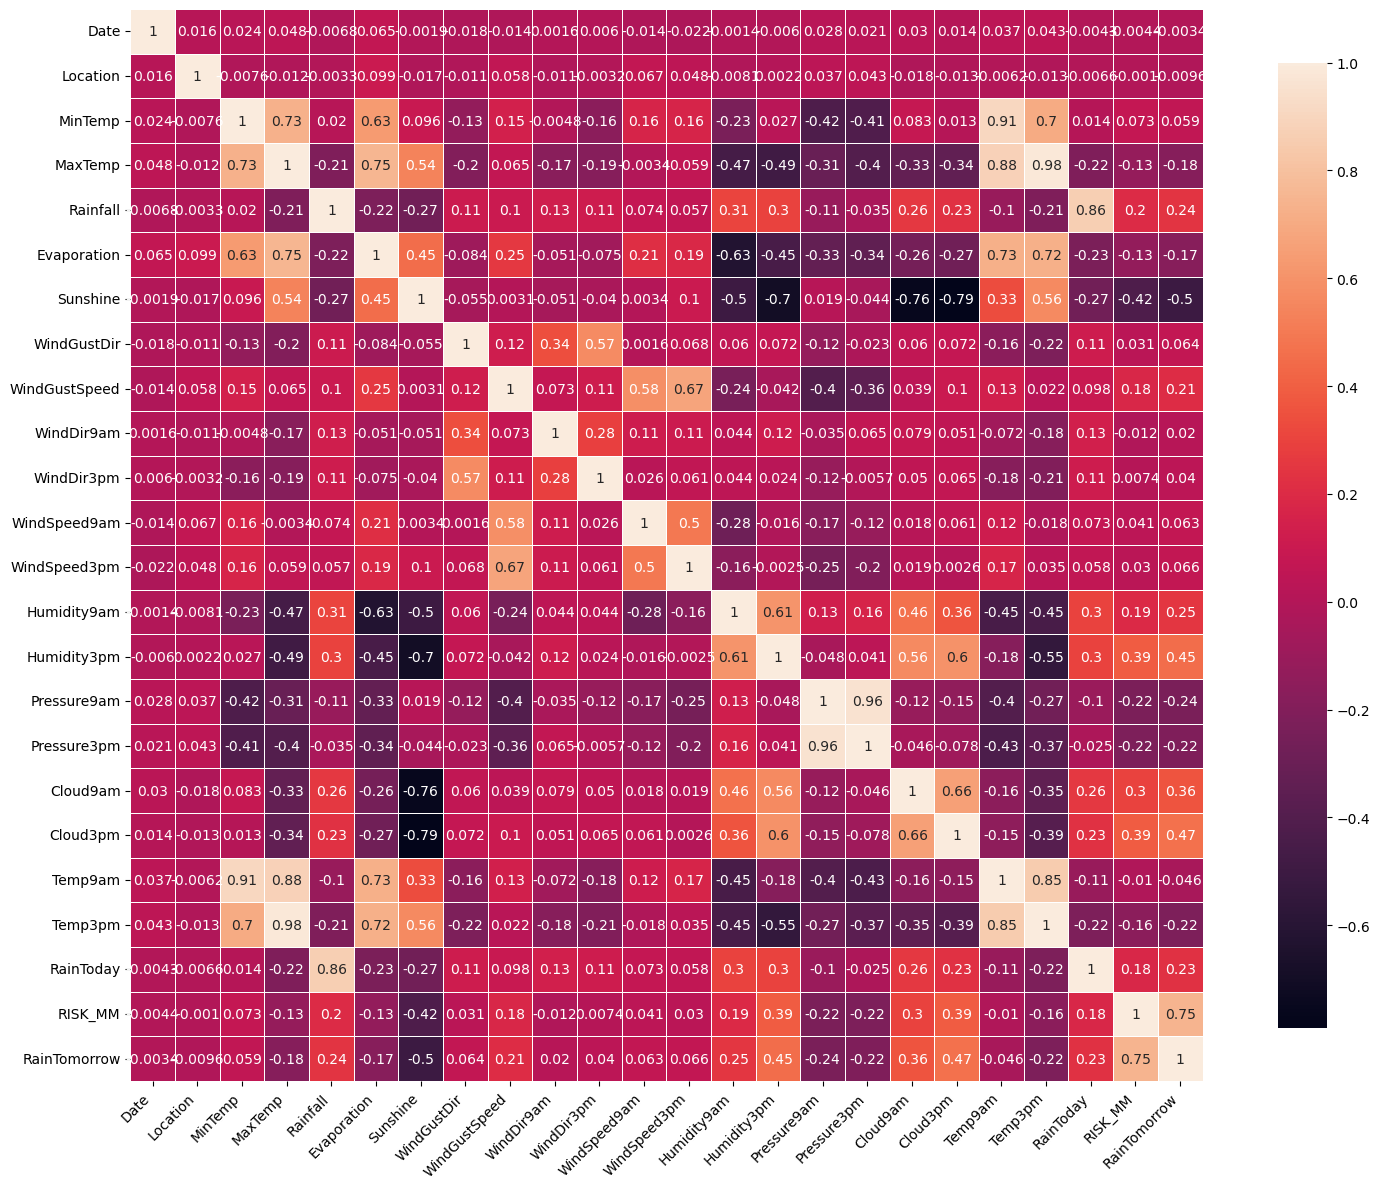

In [157]:
#Checking for collinearity
corr = MiceImputed.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, square=True, linewidths=0.5, cbar_kws={"shrink": .9})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [158]:
#Pairwise correlation, remove comment if u want to check
#sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )


In [159]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(MiceImputed)
normalized_data = pd.DataFrame(scaler.fit_transform(MiceImputed), columns=MiceImputed.columns, index=MiceImputed.index)

In [160]:
#you may select features using chi-squared method
#Or maybe the wrapper method

In [214]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [215]:
from sklearn.metrics import accuracy_score, roc_auc_score
def run_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    
    return model, accuracy, roc_auc

In [216]:
#Dont forget to install your required models
#pip install lightgbm 
#!pip install xgboost

In [218]:
#Training on different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb

model_lr = LogisticRegression()
model_lr, accuracy_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

model_rf = RandomForestClassifier()
model_rf, accuracy_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

model_nn = MLPClassifier()
model_nn, accuracy_nn, roc_auc_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

model_lgb = lgb.LGBMClassifier()
model_lgb, accuracy_lgb, roc_auc_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Accuracy = 0.7899754626316328
ROC Area under Curve = 0.7696346486982292
Accuracy = 0.9592833043656068
ROC Area under Curve = 0.9610565401437862
Accuracy = 0.8828596258051324
ROC Area under Curve = 0.8774636049289307
[LightGBM] [Info] Number of positive: 45719, number of negative: 71650
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4317
[LightGBM] [Info] Number of data points in the train set: 117369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389532 -> initscore=-0.449279
[LightGBM] [Info] Start training from score -0.449279
Accuracy = 0.8408905019936612
ROC Area under Curve = 0.8329890683025282


<Axes: xlabel='Model', ylabel='Accuracy'>

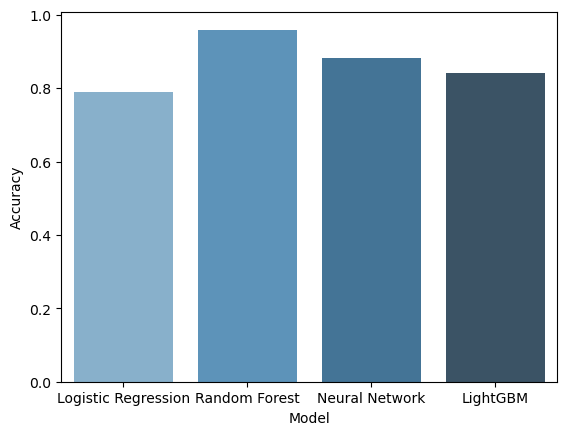

In [220]:
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_nn, accuracy_lgb]
roc_auc_scores = [roc_auc_lr, roc_auc_rf, roc_auc_nn, roc_auc_lgb]

results_data = {'Model': ['Logistic Regression','Random Forest','Neural Network','LightGBM'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
               }
data = pd.DataFrame(results_data)

sns.barplot(x='Model', y='Accuracy', data=data, palette='Blues_d')


<Axes: xlabel='Model', ylabel='ROC_AUC'>

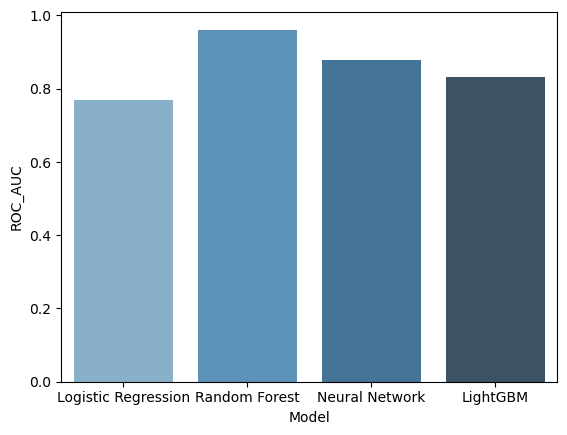

In [221]:
sns.barplot(x="Model", y="ROC_AUC", data = data, palette='Blues_d')